In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Import data
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
'''I. Prices in Each Neighbourhood Group/Neighbourhood'''

# Airbnb prices in different boroughs
df2 = df.copy()
print(df2.groupby('neighbourhood_group').size())

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64


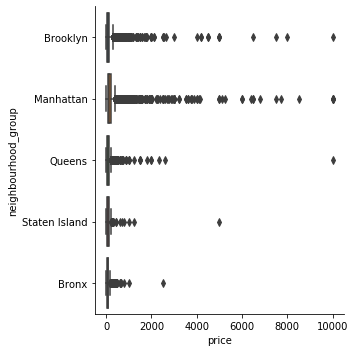

In [6]:
# Considering the large size of each neighbourhood group, choose boxen plot to visualize the price distribution
g = sns.catplot(x = 'price', y = 'neighbourhood_group', data = df2, kind = 'box')

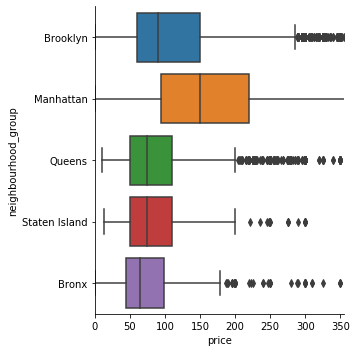

In [7]:
# Many outliers are seen in the box plot
# Take a closer look at prices below 95% percentile in each neighbourhood group

g = sns.catplot(x = 'price', y = 'neighbourhood_group', data = df2, kind = 'box')
g.set(xlim = (np.min(df2['price']),np.percentile(df2['price'], 95))) 

In [8]:
# There are still price outliers below 95% percentile in each neighbourhood group
# But we can more clearly see that Manhattan has an overall higher price than other neighbourhood groups

C:\Users\lw1365\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  after removing the cwd from sys.path.


Median_price_neighbour
neighbourhood_group neighbourhood                        
Bronx               Allerton                         66.5
                    Baychester                       75.0
                    Belmont                          52.5
                    Bronxdale                        50.0
                    Castle Hill                      39.0

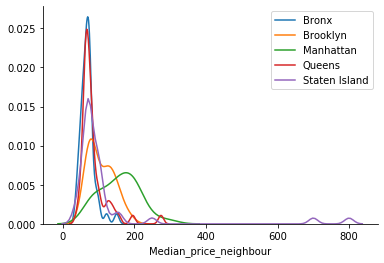

In [38]:
# Next, let's look at the distribution of prices in all neighbourhoods in each neighbourhood group

# Look at the median price of each neighbourhood
df21 = df2.groupby(['neighbourhood_group', 'neighbourhood'])['price'].agg({'Median_price_neighbour': np.median})

# Create the new columns in the dataframe for the median price in each neighbourhood
df21a = []
df21b = []
for x in range(len(df21)):
    df21a.append(df21.index[x][0])
    df21b.append(df21.index[x][1])
df21['Borough'] = df21a
df21['Neighbour'] = df21b
boroughs = df21['Borough'].unique()
targets = [df21.loc[df21['Borough'] == borough] for borough in boroughs] 

# Plot the distribution of the median price in each neighbourhood for each neighbourhood group
fig = plt.figure(figsize=(6,4))
for target in targets:
    sns.distplot(target['Median_price_neighbour'], hist = False, label = target['Borough'][0])
sns.despine()
df21 = df21.drop(['Borough', 'Neighbour'], axis = 1)
df21.head()

In [39]:
# Overall, Bronx and Queens have the narrowest range of Airbnb prices, compared to other boroughs, 
# and the majority of them centers below ~$100/night
# Stanten Island has a wider range of prices, but its majority also centers below ~$100/night
# Brooklyn prices' distribution has a little shoulder, suggesting that prices around ~$100/night and ~$150/night 
# are both pretty common
# Manhattan has the biggest range of prices, and the biggest group of prices centers around ~$200/night


In [47]:
# The median price of Manhattan neighbourhoods
df21_M = df21.loc['Manhattan']
df21_M

Median_price_neighbour
neighbourhood                              
Battery Park City                     195.0
Chelsea                               199.0
Chinatown                             129.0
Civic Center                          169.0
East Harlem                            99.0
East Village                          150.0
Financial District                    200.0
Flatiron District                     225.0
Gramercy                              165.0
Greenwich Village                     197.5
Harlem                                 89.0
Hell's Kitchen                        168.0
Inwood                                 77.5
Kips Bay                              152.0
Little Italy                          150.0
Lower East Side                       139.0
Marble Hill                            76.5
Midtown                               210.0
Morningside Heights                    98.5
Murray Hill                           190.0
NoHo                                  250.0
Nolita                                179.0
Roosevelt Island                       80.0
SoHo                                  199.0
Stuyvesant Town                       115.0
Theater District                      190.0
Tribeca                               295.0
Two Bridges                           109.5
Upper East Side                       149.0
Upper West Side                       150.0
Washington Heights                     72.0
West Village                          200.0

In [48]:
df21_M.describe()

Median_price_neighbour
count               32.000000
mean               158.359375
std                 54.209009
min                 72.000000
25%                113.625000
50%                158.500000
75%                197.875000
max                295.000000

In [ ]:
# As shown in the destribution plot and the table above, Manhattan's Airbnb prices range from $72 to $295/night
# and has a large variability ($54/night)

In [49]:
# The most expensive 5 neighbourhoods in Manhattan
df21_M['Median_price_neighbour'].nlargest(5)

neighbourhood
Tribeca               295.0
NoHo                  250.0
Flatiron District     225.0
Midtown               210.0
Financial District    200.0
Name: Median_price_neighbour, dtype: float64

In [51]:
# The cheapest 5 neighbourhoods in Manhattan
df21_M['Median_price_neighbour'].nsmallest(5)

neighbourhood
Washington Heights    72.0
Marble Hill           76.5
Inwood                77.5
Roosevelt Island      80.0
Harlem                89.0
Name: Median_price_neighbour, dtype: float64

In [50]:
# The most expensive 5 neighbourhoods in Brooklyn
df21_B = df21.loc['Brooklyn']
df21_B['Median_price_neighbour'].nlargest(5)

neighbourhood
DUMBO           189.0
Vinegar Hill    175.0
Mill Basin      167.5
Cobble Hill     156.0
Boerum Hill     150.0
Name: Median_price_neighbour, dtype: float64

In [ ]:
# Future analysis can go deeper into the reasons behind neighbourhoods' price variability
# by mapping the neighbourhoods onto landmark maps and MTA maps

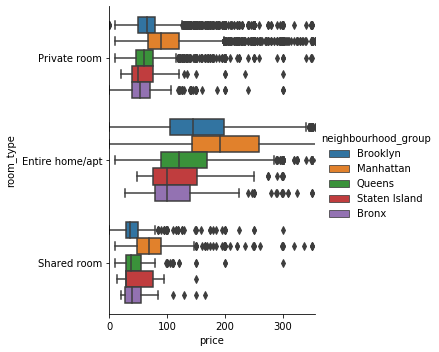

In [52]:
'''II. Prices Based on the Room Type'''

# Look at the prices of different types of Airbnb
g = sns.catplot(x = 'price', y = 'room_type', data = df2, kind = 'box', hue = 'neighbourhood_group')
# For better visualization, look at data under 95% percentile
g.set(xlim = (np.min(df2['price']),np.percentile(df2['price'], 95))) 

In [53]:
# The box plot suggests 1) entire homes or apartments cost more than private rooms and shared rooms; 
# 2) generally, Manhattan is more expensive than Brooklyn, loosely followed by Queens, Stanten Island, and Bronx.

In [57]:
'''III. Customers' Reviews'''

# Look at the overall comments for the Airbnb by using Natural Language Toolkit
import nltk
# nltk.download('punkt')
# nltk.download ('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from nltk.probability import FreqDist

# English stopwords include prepositional words, conjunctions, pronouns, and etc.
stopwords = set(stopwords.words('english')) 
ps = PorterStemmer()

# Only look at customers' reviews (name) in different neighbourhood_groups
df22 = pd.DataFrame([df2['neighbourhood_group'], df2['neighbourhood'], df2['price'], df2['name']]).T.dropna()
df22a = []
for x in df22.index:
    k = word_tokenize(df22['name'][x]) # tokenize each review
    k1 =[]
    for w in k:
        k1.append(ps.stem(w)) # remove capitalization and symbols
    k2=[]
    for w in k1:
        w = re.sub('[^A-Za-z]+', '', w) # remove symbols and numbers
        if len(w)>0: # remove the empty strings
            if w not in stopwords:
                k2.append(w)
    df22a.append(k2)

df22['Tokenized_Stemmed'] = df22a

[('room', 10277), ('bedroom', 8335), ('privat', 7208), ('apart', 6700), ('cozi', 5052), ('apt', 4654), ('brooklyn', 4138), ('studio', 4024), ('spaciou', 3750), ('manhattan', 3516), ('park', 3224), ('east', 3022), ('sunni', 2907), ('br', 2798), ('williamsburg', 2649), ('beauti', 2606), ('near', 2333), ('villag', 2242), ('nyc', 2219), ('loft', 2058)]


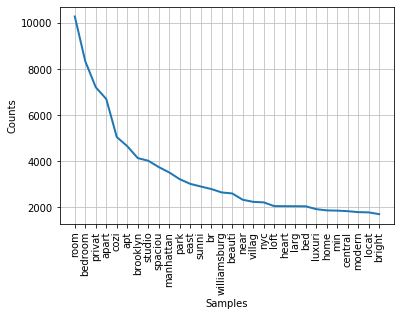

In [58]:
# check what is the most common words in all
words = []
for x in df22.index:
    for w in df22['Tokenized_Stemmed'][x]:
        words.append(w)
freq22 = FreqDist(words)
print(freq22.most_common(20))
freq22.plot(30)

[('privat', 7208), ('cozi', 5052), ('spaciou', 3750), ('park', 3224), ('east', 3022), ('sunni', 2907), ('williamsburg', 2649), ('beauti', 2606), ('near', 2333), ('villag', 2242), ('nyc', 2219), ('loft', 2058), ('heart', 2054), ('larg', 2052), ('bed', 2048), ('luxuri', 1926), ('home', 1872), ('min', 1861), ('central', 1838), ('modern', 1796), ('locat', 1786), ('bright', 1708), ('west', 1562), ('new', 1552), ('charm', 1486), ('w', 1434), ('side', 1404), ('bushwick', 1357), ('upper', 1332), ('midtown', 1253)]


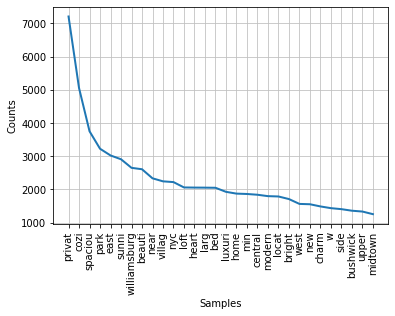

In [62]:
# From the list above, note that neutral words such as "room", "bedroom", "apart", "apt", "studio" are 
# among the most mentioned in the customers' reviews
# To have a better representation of the reviews, here I remove these neutral words
neu_words = ['room', 'bedroom', 'apart', 'apt', 'studio', 'br', 'manhattan', 'brooklyn', 'bronx', 'staten', 'island', 'queen']
words = []
for x in df22.index:
    for w in df22['Tokenized_Stemmed'][x]:
        if w not in neu_words:
            words.append(w)
freq22 = FreqDist(words)
print(freq22.most_common(30))
freq22.plot(30)

In [ ]:
# I have two observations here: 1) overall, the reviews have good sentiment; 2) most often,
# the reviews focus on the privacy, coziness, spaciousness, aesthetics, and locations
# of the apartments or rooms

['Bronx']
[('privat', 203), ('cozi', 122), ('home', 108), ('nyc', 87), ('near', 70), ('spaciou', 69), ('yanke', 66), ('larg', 60), ('stadium', 54), ('min', 46), ('beauti', 46), ('new', 42), ('bed', 38), ('comfort', 36), ('place', 36), ('hous', 35), ('modern', 33), ('citi', 33), ('close', 33), ('clean', 32), ('A', 31), ('subway', 30), ('minut', 28), ('away', 28), ('sunni', 27), ('quiet', 26), ('comfi', 25), ('NY', 24), ('luxuri', 23), ('riverdal', 22)]


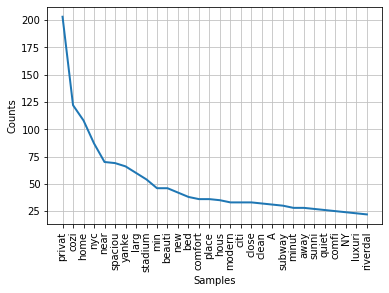

['Brooklyn']
[('privat', 3292), ('williamsburg', 2643), ('cozi', 2023), ('spaciou', 1761), ('sunni', 1687), ('park', 1403), ('bushwick', 1316), ('beauti', 1281), ('loft', 1271), ('brownston', 952), ('bright', 927), ('modern', 840), ('larg', 837), ('bed', 830), ('garden', 821), ('home', 811), ('heart', 790), ('w', 654), ('min', 653), ('near', 640), ('charm', 630), ('slope', 595), ('height', 585), ('prospect', 579), ('bedstuy', 557), ('duplex', 545), ('train', 536), ('luxuri', 515), ('greenpoint', 513), ('subway', 509)]


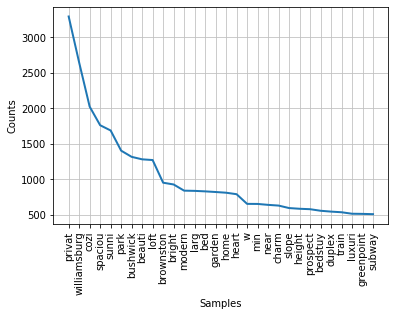

['Manhattan']
[('east', 2810), ('privat', 2648), ('villag', 2228), ('cozi', 2087), ('central', 1679), ('park', 1655), ('west', 1555), ('spaciou', 1533), ('side', 1392), ('nyc', 1359), ('upper', 1323), ('luxuri', 1224), ('near', 1162), ('locat', 1147), ('heart', 1126), ('midtown', 1112), ('harlem', 1105), ('beauti', 1017), ('sunni', 990), ('time', 974), ('squar', 935), ('bed', 923), ('larg', 921), ('new', 761), ('modern', 760), ('charm', 741), ('loft', 717), ('view', 705), ('chelsea', 678), ('one', 662)]


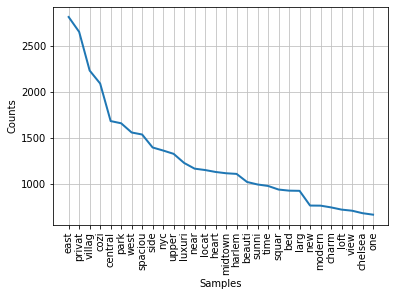

['Queens']
[('privat', 987), ('min', 819), ('cozi', 773), ('astoria', 599), ('jfk', 480), ('near', 426), ('home', 392), ('nyc', 384), ('spaciou', 365), ('close', 312), ('lga', 286), ('beauti', 248), ('bed', 243), ('new', 237), ('larg', 223), ('minut', 222), ('subway', 210), ('clean', 209), ('airport', 201), ('sunni', 199), ('citi', 199), ('train', 196), ('hous', 182), ('locat', 161), ('luxuri', 160), ('modern', 156), ('quiet', 155), ('park', 145), ('NY', 144), ('one', 141)]


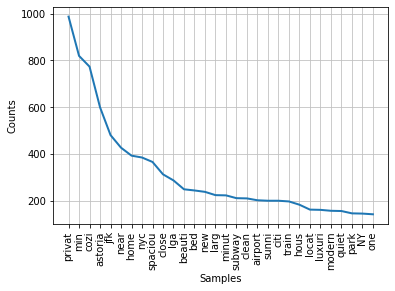

['Staten Island']
[('privat', 78), ('ferri', 61), ('nyc', 48), ('home', 48), ('cozi', 47), ('near', 35), ('hous', 32), ('min', 23), ('spaciou', 22), ('new', 19), ('free', 19), ('close', 17), ('bed', 14), ('beauti', 14), ('charm', 14), ('SI', 13), ('renov', 13), ('guest', 12), ('suit', 12), ('quiet', 12), ('newli', 12), ('away', 12), ('w', 11), ('park', 11), ('larg', 11), ('minut', 11), ('beach', 11), ('york', 10), ('view', 10), ('A', 10)]


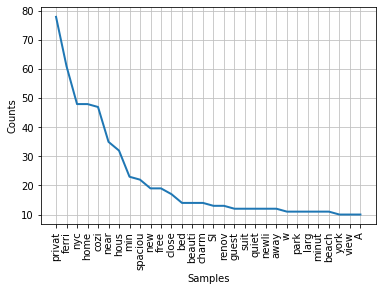

In [63]:
# check what is the most common words in each borough
targets = [df22.loc[df22['neighbourhood_group'] == borough] for borough in boroughs] # this generates five data frames within targets
df22c = {}
ii = 0
for a in targets:
    words = []
    for x in a.index:
        for w in a['Tokenized_Stemmed'][x]:
             if w not in neu_words:
                    words.append(w)
    df22c[ii] = words # has to save as a dictionary
    freq22 = FreqDist(words)
    print(a['neighbourhood_group'].unique())
    print(freq22.most_common(30))
    freq22.plot(30)
    ii += 1

In [64]:
# I see a few interesting things here: 
# 1) The reviews are very neighourhood group-specific. 
# For example, in the Bronx, people often mention the landmarks such as the Yankee Stadium. Being large and close to 
# subways are also mentioned
# In Queens, two airports JFK and LGA are mentioned a lot
# In Stanten Island, ferry, the sole transportation to the rest of New York, is mentioned
# 2) There are still some locations mentioned in the popular words. With the current method, it is 
# difficult to know whether these locations are neutral words or have positive or negative sentiment

In [77]:
'''IV. Price Prediction with Machine Learning'''

# Find missing values and remove the instances
df3 = df.copy()
df3 = df3.dropna().reset_index().drop(['index'], axis = 1)
df3.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355

In [78]:
# Convert the dates of the last review to numerical values
import datetime
from datetime import datetime
from datetime import date
today = date.today()
today = datetime.strptime(str(today), '%Y-%m-%d')
k = []
for x in range(len(df3)):
    k.append(datetime.strptime(df3['last_review'][x], '%Y-%m-%d'))
df3['last_review'] = k
df3['Days since last review'] = today - df3['last_review']
df3['Days since last review']

0       479 days
1       265 days
2       220 days
3       448 days
4       233 days
          ...   
38816   218 days
38817   218 days
38818   218 days
38819   218 days
38820   217 days
Name: Days since last review, Length: 38821, dtype: timedelta64[ns]

In [79]:
# Only keep the numerical values for the days since the last review
k = []
j = []
for x in range(len(df3)):
    if len(str(df3['Days since last review'][x])) == 18: # earliest last review was in 2011, made the days four digits
        k.append(int(str(df3['Days since last review'][x])[:4]))
    elif len(str(df3['Days since last review'][x])) == 17: 
        k.append(int(str(df3['Days since last review'][x])[:3]))
df3['Days since last review'] = k
df3 = df3.drop(['last_review'], axis = 1)

In [80]:
# Drop non-numerical columns
X = df3.drop(['price'], axis = 1) 
y = df3['price']
X.info()
X_num = X.copy()
X_num = X_num.drop(['name', 'host_name', 'neighbourhood_group','neighbourhood', 'room_type'], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38821 entries, 0 to 38820
Data columns (total 15 columns):
id                                38821 non-null int64
name                              38821 non-null object
host_id                           38821 non-null int64
host_name                         38821 non-null object
neighbourhood_group               38821 non-null object
neighbourhood                     38821 non-null object
latitude                          38821 non-null float64
longitude                         38821 non-null float64
room_type                         38821 non-null object
minimum_nights                    38821 non-null int64
number_of_reviews                 38821 non-null int64
reviews_per_month                 38821 non-null float64
calculated_host_listings_count    38821 non-null int64
availability_365                  38821 non-null int64
Days since last review            38821 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 4

In [83]:
# Remove outliers in the numerical columns
data_outliers = ['minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price']
df3a = df3.copy()
for ii in data_outliers:
    df3a_mean = []
    df3a_std = []
    cutoff = []
    lower = []
    upper = []
    df3a_mean, df3a_std = np.mean(df3a[ii]), np.std(df3a[ii])
    cutoff = df3a_std * 3
    lower, upper = df3a_mean - cutoff, df3a_mean + cutoff
    lower = max(lower, 0)
    df3a[ii] = df3a[ii].where((df3a[ii] > lower) & (df3a[ii] < upper)) # remove data above 3 stds away from the mean
df3a = df3a.dropna()
for ii in data_outliers:
    df3a[ii] = df3a[ii].tolist()
df3a = df3a.reset_index().drop(['index'], axis = 1)

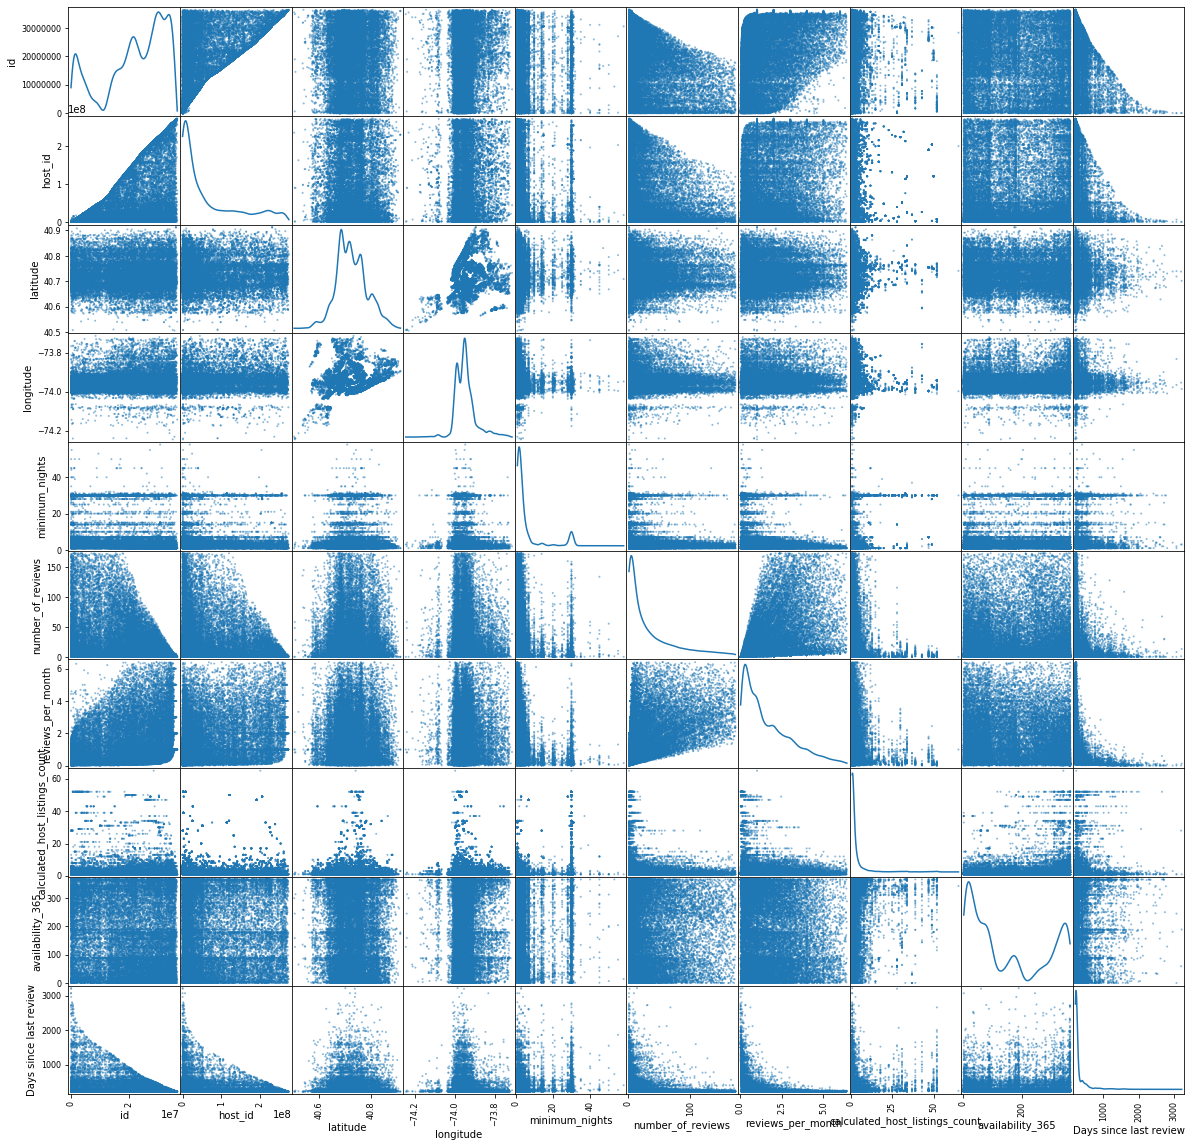

In [87]:
# Visualize the numerical features with pair plots
X = df3a.drop(['price'], axis = 1) 
y = df3a['price']
# X.info()
X_num = X.copy()
X_num = X_num.drop(['name', 'host_name', 'neighbourhood_group','neighbourhood', 'room_type'], axis = 1)
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, marker = 'o', s = 4, diagonal = 'kde', figsize = (20,20), cmap = cmap)

In [90]:
# What I oberve:


10

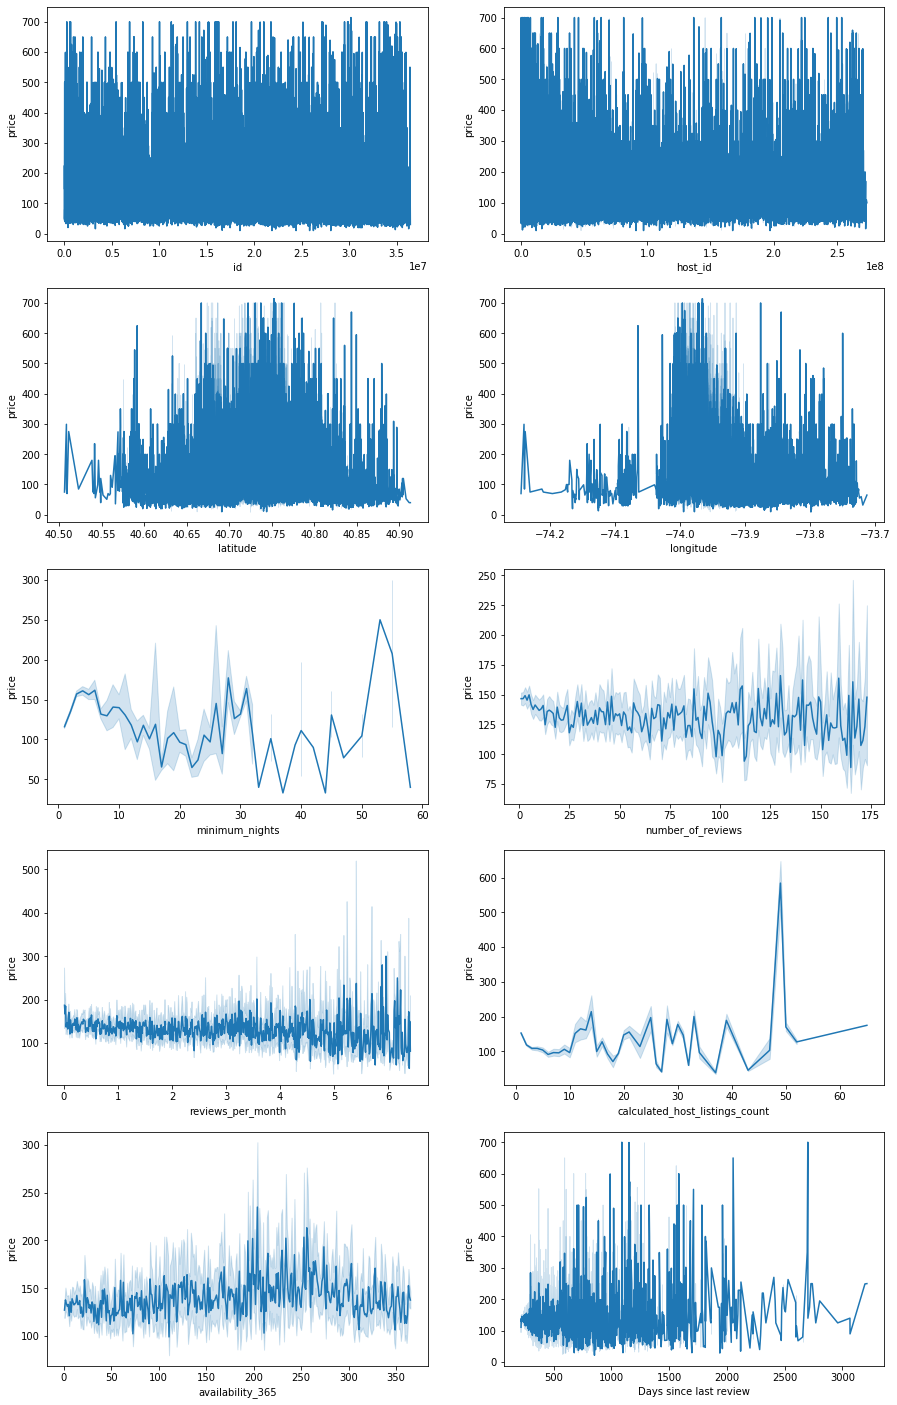

In [112]:
# Visualize the relationship between features and the target value, price
f, axes = plt.subplots(5, 2, figsize=(15, 25))
for ii, num in zip(X_num.columns, range(11)):
    p = sns.relplot(x = ii, y = 'price', data = df3a, kind='line', ax=axes[int(np.floor(num/2)), int(num%2)]) 
    plt.close(p.fig)

In [113]:
# The plots suggested that no features have direct linear relationship with the price 
# ID, host_id, and host_name do not add much. Currently, does not consider the impact of review
df3b = df3a.copy()
df3b = df3b.drop(['id', 'name', 'host_id', 'host_name'], axis = 1)

In [114]:
# Convert the categorical data to numerical values
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
df3c = pd.DataFrame([df3b['neighbourhood_group'], df3b['room_type']]).T 
df3c['neighbourhood_group'] = le.fit_transform(df3c['neighbourhood_group']) #convert neighhourhood groups to distinct numbers
df3c['room_type'] = le.fit_transform(df3c['room_type']) #convert room types to distinct numbers
ohe = OneHotEncoder()
df3c = ohe.fit_transform(df3c).toarray() # use one hot encoder to convert distinct numbers to columns of 0s and 1s
df3d = pd.DataFrame(df3c, columns = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Stanten Island', 'Entire Home/Apt', 'Private Room', 'Shared Room'])
df4 = pd.merge(df3b, df3d, how = 'outer', left_index = True, right_index = True)
df4 = df4.drop(['neighbourhood', 'neighbourhood_group', 'room_type'], axis = 1)

C:\Users\lw1365\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [115]:
# Prepare for training sets and testing sets
X = df4.drop(['price'], axis = 1) 
y = df4['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [116]:
# Use decision tree to determine the most prominent features
from sklearn.tree import DecisionTreeClassifier
feature_names = X.columns
class_names = ['price']
clf = DecisionTreeClassifier(max_depth = 5).fit(X_train, y_train)
print(clf.score(X_train, y_train)) 
print(clf.score(X_test, y_test)) 

0.07809171431774863
0.07011938792668572


In [120]:
# Visualize the decision tree
!pip install graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
!pip install pydotplus
import pydotplus
from IPython.display import Image, display
dot_data = StringIO()
export_graphviz(clf, dot_data, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

In [121]:
# What I oberve:


In [122]:
# Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
# Algirthm 1 -- K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 20).fit(X_train_scaled, y_train)
print(knnreg.score(X_train_scaled, y_train)) 
print(knnreg.score(X_test_scaled, y_test)) 

0.5019840868561507
0.4516418701941567


In [126]:
# Algotithm 2-- Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train_scaled, y_train)
print(linreg.score(X_train_scaled, y_train)) 
print(linreg.score(X_test_scaled, y_test)) 

0.3842348972091204
0.3906731618640762


In [127]:
# Algorithm 3 -- Ridge Regression
from sklearn.linear_model import Ridge
linridge = Ridge(alpha = 20).fit(X_train_scaled, y_train) #doesnt change much changing alpha
print(linridge.score(X_train_scaled, y_train)) 
print(linridge.score(X_test_scaled, y_test)) 

0.3831511270407
0.3886264130337853


In [128]:
# Algorithm 4 -- Lasso Regression
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha = 2, max_iter = 10000).fit(X_train_scaled, y_train) 
print(linlasso.score(X_train_scaled, y_train)) 
print(linlasso.score(X_test_scaled, y_test)) 

0.3337158012295325
0.3350346150859937


In [129]:
# Algorithm 5 -- Linear Support Vector Machine 
from sklearn.svm import SVC
linsvc = SVC(kernel = 'linear', C = 1.0).fit(X_train_scaled, y_train) 
print(linsvc.score(X_train_scaled, y_train)) 
print(linsvc.score(X_test_scaled, y_test)) 

0.07130844265052136
0.06372961156885824


In [130]:
# Algorithm 6 -- Kenalized Support Vector Machine 
rbfsvc = SVC().fit(X_train_scaled, y_train) # may need to test a few Cs
print(rbfsvc.score(X_train_scaled, y_train)) 
print(rbfsvc.score(X_test_scaled, y_test)) 

C:\Users\lw1365\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.06833725754008296
0.060366571380528


In [133]:
# K-fold cross validation of the best algorithm
''' Looks like KNN is relatively better than other methods:'''
from sklearn.model_selection import cross_val_score
X_scaled = scaler.fit_transform(X)
cv_scores = cross_val_score(knnreg, X_scaled, y, cv = 100)
print(np.mean(cv_scores)) #0.48 for cv=10 and cv = 100 0.44 for cv=10

0.418342176576997
